In [1]:
import pandas as pd 
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()

data_path = "../DATA/questions.json"

client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  # This is the default and can be omitted
)

def ask_gpt(question):
    context = "I will send you two texts, I ask you to send me back ONLY a similarity score between the 2 texts based on the meaning of the sentences and the syntactic similarity. This score must be between 0 and 1 (0 completely different, 1 exactly the same).you send me only the score example: 0.332"
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": context + "\n" + question,
            }
        ],
        model="gpt-4o",
    )
    return float(response.choices[0].message.content)



In [2]:
df = pd.read_json(data_path)
df

,idCategory,Category,Question,Expected Answer,Mistral Answer,GPT3 Answer,GPT4 Answer,Similarity Score Mistral,Similarity Score GPT3,Similarity Score GPT4,Average Similarity Score Mistral,Average Similarity Score GPT3,Average Similarity Score GPT4
0,1,Physical Properties,"When you touch silk with your hand, how does i...","[Silk is soft and glides on the hand, while bu...","Silk feels smooth and soft, while burlap feels...","Silk feels smooth and luxurious, while burlap ...","Silk feels smooth, soft and delicate while bur...","[0.8923475742, 0.9318427444, 0.9142323732000001]","[0.8911210895, 0.9384325743, 0.9211310148]","[0.8830408454, 0.9175930023000001, 0.8983666897]",0.912808,0.916895,0.899667
1,1,Physical Properties,Does a wooden cube float on water? How does it...,"[Yes, it floats. Part of the cube is in the wa...","Yes, a wooden cube floats on water. It partial...","Yes, a wooden cube typically floats on water d...","Yes, a wooden cube typically floats on water d...","[0.8401782513, 0.3653429747, 0.6574210525]","[0.8402737379, 0.4007389545, 0.6466634870000001]","[0.8459082842000001, 0.3860016465, 0.682729423...",0.620981,0.629225,0.638213
2,1,Physical Properties,If a ceramic vase falls on the ground and you ...,"[I might cut my foot., I risk injuring myself ...",You might cut your feet on the broken vase pie...,You could potentially cut your foot on the sha...,You could step on the shards and injure your f...,"[0.6199144721000001, 0.6426110268, 0.5364691019]","[0.5593261123000001, 0.6749641895, 0.5024743676]","[0.5072021484, 0.3859369755, 0.5310435295]",0.599665,0.578922,0.474728
3,1,Physical Properties,Can you hold a ping pong ball in your hand?,"[Yes, I can hold a ping pong ball in my hand.,...","Yes, a ping pong ball can easily fit in the pa...","Yes, I can hold a ping pong ball in my hand.","Yes, you can hold a ping pong ball in your hand.","[0.8367519379, 0.5344014168, 0.12416255470000001]","[1.0000001192, 0.6460697651, 0.3011770546]","[0.9686675072, 0.5887349844, 0.2662510872]",0.498439,0.649082,0.607885
4,1,Physical Properties,Have you ever slipped on ice?,"[Yes, I almost fell when I was a child., No, I...","I don't have personal experiences or a body, s...","No, I have never slipped on ice.","As an artificial intelligence, I don't have a ...","[0.4126036763, 0.7213183641, 0.4037111104]","[0.4380488396, 0.7953952551, 0.4461005628]","[0.2765291929, 0.5426995754, 0.1317906678]",0.512544,0.559848,0.317006
5,2,Causal Relationships,What happens if you blow on a lit candle?,"[The flame will go out., If I blow hard, it co...",Blowing on a lit candle extinguishes the flame...,Blowing on a lit candle will extinguish the fl...,The candle flame goes out due to lack of heat ...,"[0.5302774906000001, 0.4045503736, 0.1908577383]","[0.6998960376000001, 0.40887895230000004, 0.20...","[0.6481176019, 0.355858624, 0.3291406333]",0.375229,0.436968,0.444372
6,2,Causal Relationships,Have you ever popped a balloon by blowing too ...,"[Yes, the first time it surprised me a lot wit...","No, I can't physically interact with objects. ...","Yes, I have popped a balloon by blowing too mu...","As an AI, I don't have personal experiences or...","[0.0678310692, 0.22000485660000002, 0.1150331125]","[0.4902577698, 0.8278386593, 0.4211066365]","[0.2032607496, 0.4106581211, 0.17623251680000002]",0.134290,0.579734,0.263384
7,2,Causal Relationships,"When you look at an aquarium, do the fish appe...","[Yes, the glass acts like a magnifying lens., ...","Yes, fish appear slightly larger due to refrac...","Yes, fish may appear larger when viewed from o...","Yes, due to the refraction of light in water, ...","[0.4064112902, 0.7351030111, 0.4844964445]","[0.3468857408, 0.7323682904000001, 0.396147519...","[0.33994150160000003, 0.6833116412, 0.44067054...",0.542004,0.491801,0.487975
8,2,Causal Relationships,"If you have an apple in your hand and drop it,...","[It will fall because of gravity., It falls, g...",Gravity pulls the apple down to the ground.,The ap

In [3]:
#uplaod the data
list_expected_answers = df['Expected Answer'].tolist()
list_mistral_answers = df['Mistral Answer'].tolist()
list_gpt_answers3 = df['GPT3 Answer'].tolist()
list_gpt_answers4 = df['GPT4 Answer'].tolist()

# Calculate similarity score
similarity_score_mistral = []
similarity_score_gpt3 = []
similarity_score_gpt4 = []

def create_prompt(text1, text2):
	return f"Text 1: {text1}\nText 2: {text2}\n"

for i in range(len(list_expected_answers)):
	item_mistral = []
	item_gpt3 = []
	item_gpt4 = []
	for j in range(len(list_expected_answers[i])):
		item_mistral.append(ask_gpt(create_prompt(list_expected_answers[i][j], list_mistral_answers[i])))
		item_gpt3.append(ask_gpt(create_prompt(list_expected_answers[i][j], list_gpt_answers3[i])))
		item_gpt4.append(ask_gpt(create_prompt(list_expected_answers[i][j], list_gpt_answers4[i])))
	similarity_score_mistral.append(item_mistral)
	similarity_score_gpt3.append(item_gpt3)
	similarity_score_gpt4.append(item_gpt4)

# for i in range(len(list_expected_answers)):
# 	similarity_score_mistral.append(ask_gpt(create_prompt(list_expected_answers[i], list_mistral_answers[i])))
# 	similarity_score_gpt3.append(ask_gpt(create_prompt(list_expected_answers[i], list_gpt_answers3[i])))
# 	similarity_score_gpt4.append(ask_gpt(create_prompt(list_expected_answers[i], list_gpt_answers4[i])))

# Add similarity score to the dataframe
df['Similarity Score Mistral'] = similarity_score_mistral
df['Similarity Score GPT3'] = similarity_score_gpt3
df['Similarity Score GPT4'] = similarity_score_gpt4

df
df.to_json('../DATA/questions_result_GPT4.json', orient='records', indent=4)

In [9]:
# Calculate the average for each similarity score
mistral_similarity_score = df['Similarity Score Mistral'].to_list()
gpt3_similarity_score = df['Similarity Score GPT3'].to_list()
gpt4_similarity_score = df['Similarity Score GPT4'].to_list()

for i in range(len(mistral_similarity_score)):
	mistral_similarity_score[i] = sum(mistral_similarity_score[i])/len(mistral_similarity_score[i])
	gpt3_similarity_score[i] = sum(gpt3_similarity_score[i])/len(gpt3_similarity_score[i])
	gpt4_similarity_score[i] = sum(gpt4_similarity_score[i])/len(gpt4_similarity_score[i])

# Add the average similarity score to the dataframe
df['Average Similarity Score Mistral'] = mistral_similarity_score
df['Average Similarity Score GPT3'] = gpt3_similarity_score
df['Average Similarity Score GPT4'] = gpt4_similarity_score

# Save the dataframe
df.to_json('../DATA/questions_result_GPT4.json', orient='records', indent=4)

In [4]:
df.groupby('idCategory')['Average Similarity Score Mistral'].mean()

idCategory
1    0.628887
2    0.445744
3    0.393805
Name: Average Similarity Score Mistral, dtype: float64

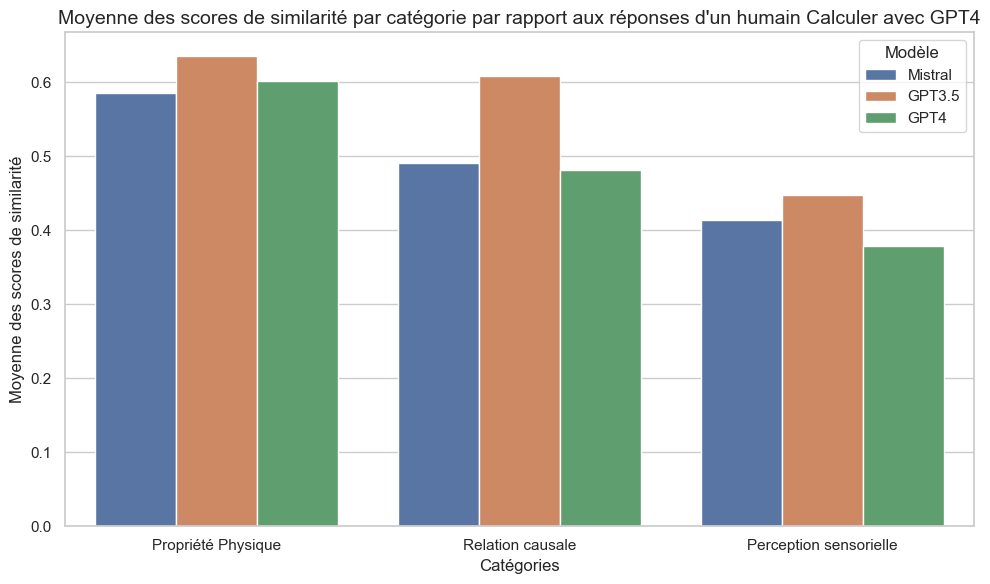

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# upload data
df = pd.read_json('../DATA/questions_result_GPT4.json')

# Calculer les moyennes par catégorie
mean_mistral = df.groupby('idCategory')['Average Similarity Score Mistral'].mean()
mean_gpt3 = df.groupby('idCategory')['Average Similarity Score GPT3'].mean()
mean_gpt4 = df.groupby('idCategory')['Average Similarity Score GPT4'].mean()

categories = ["Propriété Physique", "Relation causale", "Perception sensorielle"]

# Créer un DataFrame pour le graphique
comparison_df = pd.DataFrame({
	"Category": categories,
    "Mistral": mean_mistral,
    "GPT3.5": mean_gpt3,
    "GPT4": mean_gpt4
})

# Préparer les données pour un graphique en barres
comparison_df_melted = comparison_df.melt(id_vars="Category", var_name="Model", value_name="Similarity Score")

# Tracer le graphique avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df_melted, x="Category", y="Similarity Score", hue="Model")

# Ajouter des labels et un titre
ax.set_title("Moyenne des scores de similarité par catégorie par rapport aux réponses d'un humain Calculer avec GPT4", fontsize=14)
ax.set_xlabel("Catégories", fontsize=12)
ax.set_ylabel("Moyenne des scores de similarité", fontsize=12)
plt.legend(title="Modèle")
plt.tight_layout()

# Afficher le graphique
plt.show()